In [ ]:
#This notebook was run on kaggle

In [2]:
# Pip install method (recommended)
%pip install ultralytics
import ultralytics
ultralytics.checks()

!pip install roboflow

Ultralytics 8.3.37 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5933.9/8062.4 GB disk)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 3.0 MB/s eta 0:00:00


In [3]:
from ultralytics import YOLO
import os
from IPython.display import Image, display
from roboflow import Roboflow

In [4]:

# Initialize model
rf = Roboflow(api_key="API_KEY")
project = rf.workspace("caio-yn7ed").project("face-detection-f6kds")
version = project.version(5)
dataset = version.download("yolov8")
                


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to face-detection-5 in yolov11:: 100%|██████████| 18794/18794 [00:01<00:00, 9415.87it/s] 


In [5]:
os.makedirs('datasets',exist_ok = True)
!cp -r face-detection-5 datasets/face-detection-5

In [6]:
yolo11_model_segmentation = YOLO('yolov8n.pt')
yolo11_model_segmentation.train(data='face-detection-5/data.yaml', epochs=100, imgsz=448, batch=64,project='YOLO_weights',name='face-detection-5output',exist_ok=True)

100%|██████████| 18.4M/18.4M [00:00<00:00, 219MB/s]


Ultralytics 8.3.37 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=face-detection-5/data.yaml, epochs=100, time=None, patience=100, batch=64, imgsz=448, save=True, save_period=-1, cache=False, device=None, workers=8, project=YOLO_weights, name=face-detection-5output, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_co

100%|██████████| 755k/755k [00:00<00:00, 22.1MB/s]
2024-11-25 17:55:15,899	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-11-25 17:55:16,650	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 107MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/datasets/face-detection-5/train/labels... 6564 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6564/6564 [00:04<00:00, 1385.12it/s]


train: New cache created: /kaggle/working/datasets/face-detection-5/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.21 (you have 1.4.14). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /kaggle/working/datasets/face-detection-5/valid/labels... 1885 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1885/1885 [00:01<00:00, 1287.39it/s]

val: New cache created: /kaggle/working/datasets/face-detection-5/valid/labels.cache


Plotting labels to YOLO_weights/face-detection-5output/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 448 train, 448 val
Using 2 dataloader workers
Logging results to YOLO_weights/face-detection-5output
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      8.42G      1.565      1.627      1.369        149        448: 100%|██████████| 103/103 [00:52<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:11<00:00,  1.34it/s]

                   all       1885       5692      0.922      0.736      0.835      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100       8.7G      1.299     0.8429      1.104        147        448: 100%|██████████| 103/103 [00:53<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.38it/s]

                   all       1885       5692       0.88      0.349      0.433       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      8.09G      1.358     0.9323       1.13        151        448: 100%|██████████| 103/103 [00:58<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:11<00:00,  1.28it/s]


                   all       1885       5692      0.857      0.255      0.287      0.159

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      8.41G      1.412      1.004      1.167        218        448: 100%|██████████| 103/103 [00:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:11<00:00,  1.34it/s]


                   all       1885       5692      0.293      0.252      0.273      0.156

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100       8.1G       1.39     0.9612      1.163        164        448: 100%|██████████| 103/103 [00:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:11<00:00,  1.32it/s]


                   all       1885       5692      0.917      0.318      0.494      0.333

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      8.45G      1.354     0.9131      1.144        134        448: 100%|██████████| 103/103 [00:58<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:11<00:00,  1.33it/s]

                   all       1885       5692      0.893        0.3      0.411      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      8.88G      1.333      0.879      1.132        186        448: 100%|██████████| 103/103 [00:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:11<00:00,  1.34it/s]


                   all       1885       5692      0.754      0.611      0.708      0.486

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100       8.7G      1.311     0.8454      1.121        132        448: 100%|██████████| 103/103 [00:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:11<00:00,  1.35it/s]

                   all       1885       5692      0.696        0.6      0.671      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      8.07G      1.305      0.836      1.118        128        448: 100%|██████████| 103/103 [00:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:11<00:00,  1.35it/s]

                   all       1885       5692      0.911      0.671      0.814      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      8.26G       1.29      0.813      1.114        197        448: 100%|██████████| 103/103 [00:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:11<00:00,  1.34it/s]

                   all       1885       5692      0.909      0.772      0.846      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      8.51G      1.275     0.8025      1.107        166        448: 100%|██████████| 103/103 [00:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:11<00:00,  1.35it/s]

                   all       1885       5692      0.901      0.787      0.874      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      8.49G      1.266     0.7837      1.101        117        448: 100%|██████████| 103/103 [00:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.36it/s]

                   all       1885       5692      0.934      0.761       0.87      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      8.24G      1.254     0.7758      1.095        123        448: 100%|██████████| 103/103 [00:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.37it/s]

                   all       1885       5692      0.852      0.773      0.827      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      8.72G       1.25      0.764      1.093        135        448: 100%|██████████| 103/103 [00:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.37it/s]

                   all       1885       5692      0.917       0.82      0.884      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      8.06G      1.236     0.7525       1.09        175        448: 100%|██████████| 103/103 [00:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:11<00:00,  1.34it/s]

                   all       1885       5692       0.94      0.837      0.891      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      8.35G      1.239     0.7508      1.088        144        448: 100%|██████████| 103/103 [00:57<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:11<00:00,  1.35it/s]

                   all       1885       5692      0.905      0.854      0.901      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      8.47G      1.232      0.736      1.083        155        448: 100%|██████████| 103/103 [00:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.37it/s]

                   all       1885       5692      0.935      0.789      0.882      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      8.11G      1.219     0.7216       1.08        174        448: 100%|██████████| 103/103 [00:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.38it/s]

                   all       1885       5692      0.927      0.805      0.872      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      8.39G      1.219     0.7252      1.081        149        448: 100%|██████████| 103/103 [00:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.39it/s]

                   all       1885       5692      0.921      0.777      0.871       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      8.33G       1.21       0.72      1.074         90        448: 100%|██████████| 103/103 [00:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.37it/s]

                   all       1885       5692       0.94      0.763       0.87      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      8.11G      1.196     0.7033      1.071        130        448: 100%|██████████| 103/103 [00:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:11<00:00,  1.35it/s]

                   all       1885       5692      0.846      0.811      0.878      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      8.05G      1.195     0.6986      1.066        164        448: 100%|██████████| 103/103 [00:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.37it/s]

                   all       1885       5692      0.924      0.824      0.882       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      8.09G      1.189     0.6956      1.068        122        448: 100%|██████████| 103/103 [00:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.38it/s]

                   all       1885       5692      0.922      0.869      0.913      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      8.51G      1.196     0.6983      1.065        135        448: 100%|██████████| 103/103 [00:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.37it/s]

                   all       1885       5692      0.943      0.806      0.906      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      8.39G      1.187     0.6854      1.068        163        448: 100%|██████████| 103/103 [00:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:11<00:00,  1.36it/s]

                   all       1885       5692      0.924       0.84       0.91      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      8.48G      1.174     0.6807      1.058        133        448: 100%|██████████| 103/103 [00:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:11<00:00,  1.35it/s]

                   all       1885       5692      0.915      0.863        0.9      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      8.44G      1.184     0.6764       1.06        186        448: 100%|██████████| 103/103 [00:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.37it/s]

                   all       1885       5692      0.899      0.881      0.915       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      8.48G      1.171     0.6664      1.052        210        448: 100%|██████████| 103/103 [00:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:11<00:00,  1.36it/s]

                   all       1885       5692       0.93      0.868      0.905      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100       8.1G      1.162     0.6687      1.053        144        448: 100%|██████████| 103/103 [00:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.37it/s]

                   all       1885       5692      0.931      0.863       0.91      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100       8.6G      1.156     0.6569      1.043        169        448: 100%|██████████| 103/103 [00:58<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.37it/s]

                   all       1885       5692      0.917      0.855      0.909       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      8.08G      1.165      0.653      1.049        131        448: 100%|██████████| 103/103 [00:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:11<00:00,  1.34it/s]

                   all       1885       5692      0.929      0.872       0.91      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      8.09G       1.16     0.6541      1.051        189        448: 100%|██████████| 103/103 [00:58<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:11<00:00,  1.35it/s]

                   all       1885       5692      0.709      0.862      0.896      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      8.17G      1.156     0.6495      1.048        162        448: 100%|██████████| 103/103 [00:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:11<00:00,  1.36it/s]

                   all       1885       5692      0.941       0.87      0.907      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      8.06G      1.156     0.6512      1.048        120        448: 100%|██████████| 103/103 [00:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:11<00:00,  1.35it/s]

                   all       1885       5692      0.909      0.845      0.913      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100       8.1G       1.14     0.6454      1.043        133        448: 100%|██████████| 103/103 [00:58<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.37it/s]

                   all       1885       5692       0.93      0.836      0.907      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      8.51G      1.146     0.6344       1.04        143        448: 100%|██████████| 103/103 [00:58<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:11<00:00,  1.35it/s]

                   all       1885       5692      0.939      0.877      0.921      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      8.07G      1.145     0.6445      1.039        165        448: 100%|██████████| 103/103 [00:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.37it/s]

                   all       1885       5692      0.929      0.886      0.922      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      8.51G      1.146     0.6336      1.045        134        448: 100%|██████████| 103/103 [00:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.38it/s]

                   all       1885       5692      0.947      0.834      0.911      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100       8.5G      1.142     0.6274      1.042        215        448: 100%|██████████| 103/103 [00:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.38it/s]

                   all       1885       5692      0.946      0.872      0.914      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      8.24G      1.138     0.6229      1.034        167        448: 100%|██████████| 103/103 [00:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.38it/s]

                   all       1885       5692      0.906      0.901      0.926      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      8.08G      1.131     0.6187      1.036        204        448: 100%|██████████| 103/103 [00:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.37it/s]

                   all       1885       5692      0.912       0.87      0.924       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      8.32G      1.136     0.6242      1.039        160        448: 100%|██████████| 103/103 [00:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:11<00:00,  1.36it/s]

                   all       1885       5692      0.929      0.884      0.922      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      8.74G      1.123     0.6141      1.036        170        448: 100%|██████████| 103/103 [00:58<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.37it/s]

                   all       1885       5692      0.947      0.876      0.924      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      8.11G      1.127     0.6132      1.036        172        448: 100%|██████████| 103/103 [00:58<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:11<00:00,  1.36it/s]

                   all       1885       5692      0.923        0.9      0.926      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      8.46G      1.127     0.6128      1.035        143        448: 100%|██████████| 103/103 [00:58<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.37it/s]

                   all       1885       5692      0.916      0.896      0.926      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      8.41G      1.133     0.6109      1.037        186        448: 100%|██████████| 103/103 [00:58<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:11<00:00,  1.36it/s]

                   all       1885       5692      0.925      0.891      0.927      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      8.48G      1.125     0.6109      1.035        180        448: 100%|██████████| 103/103 [00:58<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:11<00:00,  1.33it/s]

                   all       1885       5692      0.947      0.851      0.923      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100       8.8G      1.117     0.6061      1.028        143        448: 100%|██████████| 103/103 [00:58<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.37it/s]

                   all       1885       5692      0.951      0.851      0.917      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      8.45G       1.11     0.6023      1.026        173        448: 100%|██████████| 103/103 [00:58<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:11<00:00,  1.36it/s]

                   all       1885       5692      0.943      0.893      0.929      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      8.39G      1.107     0.5927      1.027        145        448: 100%|██████████| 103/103 [00:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:11<00:00,  1.36it/s]

                   all       1885       5692      0.928      0.884      0.921      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      8.51G      1.109      0.596       1.03        161        448: 100%|██████████| 103/103 [00:58<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:11<00:00,  1.35it/s]

                   all       1885       5692      0.945      0.884      0.927      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      8.56G      1.106     0.5903      1.024        116        448: 100%|██████████| 103/103 [00:58<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:11<00:00,  1.36it/s]

                   all       1885       5692      0.936      0.883      0.929      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      8.46G      1.111     0.5902      1.027        121        448: 100%|██████████| 103/103 [00:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.39it/s]

                   all       1885       5692      0.926      0.903       0.93      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      8.08G      1.092     0.5795       1.02        193        448: 100%|██████████| 103/103 [00:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.38it/s]

                   all       1885       5692      0.924      0.897       0.93      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      8.64G      1.099     0.5772      1.018        165        448: 100%|██████████| 103/103 [00:58<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.37it/s]

                   all       1885       5692      0.917      0.902      0.918      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      8.74G      1.094     0.5783       1.02        179        448: 100%|██████████| 103/103 [00:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:11<00:00,  1.35it/s]

                   all       1885       5692      0.932      0.873      0.929      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      8.43G      1.094     0.5707      1.019        139        448: 100%|██████████| 103/103 [00:58<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:11<00:00,  1.36it/s]

                   all       1885       5692      0.928      0.901      0.931      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      8.84G      1.087     0.5747      1.018        188        448: 100%|██████████| 103/103 [00:58<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:11<00:00,  1.36it/s]

                   all       1885       5692      0.936      0.902      0.929      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      8.09G      1.096     0.5686       1.02        192        448: 100%|██████████| 103/103 [00:58<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.37it/s]

                   all       1885       5692      0.947      0.877      0.925      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      8.52G      1.084     0.5663      1.017        226        448: 100%|██████████| 103/103 [00:58<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.38it/s]

                   all       1885       5692       0.94      0.887      0.931      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      8.38G      1.084     0.5671      1.017        152        448: 100%|██████████| 103/103 [00:58<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.37it/s]

                   all       1885       5692      0.909      0.902      0.928      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      8.39G      1.073     0.5555      1.012        153        448: 100%|██████████| 103/103 [00:58<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.36it/s]

                   all       1885       5692      0.925      0.886      0.922      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      8.41G      1.081     0.5612       1.01        132        448: 100%|██████████| 103/103 [00:58<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:11<00:00,  1.35it/s]

                   all       1885       5692      0.919      0.896       0.93      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      8.04G      1.077     0.5581      1.011        193        448: 100%|██████████| 103/103 [00:58<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.37it/s]

                   all       1885       5692       0.93      0.905      0.931      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100       8.1G      1.069     0.5517      1.009        149        448: 100%|██████████| 103/103 [00:58<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:11<00:00,  1.36it/s]

                   all       1885       5692      0.944      0.891      0.932      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      8.28G      1.076     0.5512      1.011        150        448: 100%|██████████| 103/103 [00:58<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.37it/s]

                   all       1885       5692      0.936      0.888      0.931      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      8.11G      1.065     0.5483      1.009        215        448: 100%|██████████| 103/103 [00:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:11<00:00,  1.36it/s]

                   all       1885       5692      0.934      0.901      0.933      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      8.04G      1.068     0.5461       1.01        189        448: 100%|██████████| 103/103 [00:58<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.37it/s]

                   all       1885       5692      0.947      0.899      0.933      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      8.38G      1.063     0.5404      1.004        127        448: 100%|██████████| 103/103 [00:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.37it/s]

                   all       1885       5692      0.935      0.904      0.932      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      8.36G      1.056     0.5346      1.004        161        448: 100%|██████████| 103/103 [00:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.38it/s]

                   all       1885       5692       0.95      0.885      0.926      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      8.09G      1.042     0.5261      1.002        139        448: 100%|██████████| 103/103 [00:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.39it/s]

                   all       1885       5692      0.949      0.885       0.93      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100       8.1G      1.049     0.5327      1.003        146        448: 100%|██████████| 103/103 [00:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.37it/s]

                   all       1885       5692      0.931      0.891      0.933      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      8.09G      1.049     0.5291      1.005        132        448: 100%|██████████| 103/103 [00:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:11<00:00,  1.36it/s]

                   all       1885       5692      0.949      0.892      0.932      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      8.06G      1.041     0.5274      1.001        153        448: 100%|██████████| 103/103 [00:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.36it/s]

                   all       1885       5692      0.936      0.887      0.933      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      8.39G      1.052     0.5303     0.9982        149        448: 100%|██████████| 103/103 [00:58<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.37it/s]

                   all       1885       5692      0.939      0.892      0.928      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      8.04G      1.052     0.5303     0.9986        197        448: 100%|██████████| 103/103 [00:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.38it/s]

                   all       1885       5692      0.933      0.893      0.927       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      8.49G      1.048     0.5251     0.9933        140        448: 100%|██████████| 103/103 [00:58<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.37it/s]

                   all       1885       5692      0.947      0.877      0.926      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      8.06G      1.033      0.516     0.9946        186        448: 100%|██████████| 103/103 [00:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:11<00:00,  1.35it/s]

                   all       1885       5692      0.948      0.891      0.927       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      8.81G      1.044     0.5167     0.9933        159        448: 100%|██████████| 103/103 [00:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:11<00:00,  1.36it/s]

                   all       1885       5692      0.945      0.889      0.926      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      8.76G      1.034     0.5162     0.9947        197        448: 100%|██████████| 103/103 [00:58<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.37it/s]

                   all       1885       5692      0.932      0.892      0.927      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      8.48G      1.028     0.5107      0.993        159        448: 100%|██████████| 103/103 [00:58<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.37it/s]

                   all       1885       5692      0.923      0.892      0.932      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      8.39G      1.034     0.5103     0.9925        241        448: 100%|██████████| 103/103 [00:58<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.37it/s]

                   all       1885       5692      0.947       0.89      0.928      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      8.51G      1.023     0.5086     0.9881        152        448: 100%|██████████| 103/103 [00:58<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.36it/s]

                   all       1885       5692      0.924      0.899      0.934      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100       8.1G      1.018     0.5023     0.9873        143        448: 100%|██████████| 103/103 [00:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.39it/s]

                   all       1885       5692      0.932       0.89      0.933      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      8.59G      1.011     0.4962     0.9864        204        448: 100%|██████████| 103/103 [00:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.39it/s]

                   all       1885       5692      0.946       0.88      0.933      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      8.69G      1.023     0.4987     0.9894        146        448: 100%|██████████| 103/103 [00:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.39it/s]

                   all       1885       5692      0.945      0.891      0.933      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      8.04G       1.02     0.4989     0.9861        155        448: 100%|██████████| 103/103 [00:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.38it/s]

                   all       1885       5692      0.947      0.891      0.933      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      8.32G      1.015     0.4911     0.9836        135        448: 100%|██████████| 103/103 [00:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.38it/s]

                   all       1885       5692      0.948      0.892      0.934      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      8.08G      1.004     0.4898     0.9839        137        448: 100%|██████████| 103/103 [00:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.38it/s]

                   all       1885       5692      0.948      0.906      0.934      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      8.72G      1.011     0.4941     0.9858        156        448: 100%|██████████| 103/103 [00:57<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.37it/s]

                   all       1885       5692      0.947      0.908      0.934      0.786


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100       8.5G     0.9943     0.4496     0.9685        102        448: 100%|██████████| 103/103 [00:58<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.37it/s]

                   all       1885       5692      0.934      0.889      0.933      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      8.46G     0.9879      0.439     0.9646         87        448: 100%|██████████| 103/103 [00:57<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.38it/s]

                   all       1885       5692      0.943      0.889      0.933      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      8.44G     0.9799     0.4349     0.9641        101        448: 100%|██████████| 103/103 [00:57<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.37it/s]

                   all       1885       5692      0.949      0.887      0.932      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      8.66G     0.9759     0.4312     0.9598         78        448: 100%|██████████| 103/103 [00:57<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:11<00:00,  1.35it/s]

                   all       1885       5692      0.948      0.888      0.929      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      8.58G     0.9709     0.4273     0.9557        127        448: 100%|██████████| 103/103 [00:57<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.37it/s]

                   all       1885       5692       0.95      0.889      0.926      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      8.46G     0.9681     0.4253     0.9574        150        448: 100%|██████████| 103/103 [00:57<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:11<00:00,  1.35it/s]

                   all       1885       5692      0.947       0.89      0.927      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      8.49G     0.9647     0.4235     0.9549         95        448: 100%|██████████| 103/103 [00:57<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:11<00:00,  1.36it/s]

                   all       1885       5692      0.946      0.891      0.927      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      8.45G      0.961      0.421     0.9535        110        448: 100%|██████████| 103/103 [00:57<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:11<00:00,  1.36it/s]

                   all       1885       5692      0.944      0.892      0.927      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100       8.5G       0.96      0.418     0.9551        127        448: 100%|██████████| 103/103 [00:57<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.37it/s]

                   all       1885       5692      0.945      0.889      0.927      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      8.54G     0.9606     0.4182     0.9536        117        448: 100%|██████████| 103/103 [00:57<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:11<00:00,  1.35it/s]

                   all       1885       5692      0.946       0.89      0.927      0.778



100 epochs completed in 1.937 hours.
Optimizer stripped from YOLO_weights/face-detection-5output/weights/last.pt, 19.2MB
Optimizer stripped from YOLO_weights/face-detection-5output/weights/best.pt, 19.2MB

Validating YOLO_weights/face-detection-5output/weights/best.pt...
Ultralytics 8.3.37 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:14<00:00,  1.02it/s]


                   all       1885       5692      0.924        0.9      0.934      0.787
                     0       1848       5655      0.901      0.819      0.874      0.586
                     1         37         37      0.948      0.981      0.994      0.987
Speed: 0.1ms preprocess, 2.7ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to YOLO_weights/face-detection-5output


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f5200610c70>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804


image 1/942 /kaggle/working/face-detection-5/test/images/000d1eae99343db8_jpg.rf.fd8cc4b67c215a122a962bde275767f5.jpg: 448x448 1 0, 11.9ms
image 2/942 /kaggle/working/face-detection-5/test/images/00143d27992ccf33_jpg.rf.42fcbcf3f8b69c488e95a71c755c2251.jpg: 448x448 2 0s, 10.5ms
image 3/942 /kaggle/working/face-detection-5/test/images/00288c28e836fc12_jpg.rf.143f04325d7c1c5b4d6540cd2ddaae01.jpg: 448x448 1 0, 10.5ms
image 4/942 /kaggle/working/face-detection-5/test/images/00792f61cb973e00_jpg.rf.56e1b426ea94b4598fe0de5a9c238bdd.jpg: 448x448 1 0, 10.5ms
image 5/942 /kaggle/working/face-detection-5/test/images/00ab614b7a6fad2c_jpg.rf.204e2fcfbfb3e921ca0aaa7a8cddc1ff.jpg: 448x448 1 0, 10.5ms
image 6/942 /kaggle/working/face-detection-5/test/images/00cb0328e89e86f4_jpg.rf.462c5beb9344f8a4ac596ac7cd4f44a0.jpg: 448x448 6 0s, 10.6ms
image 7/942 /kaggle/working/face-detection-5/test/images/00cdf66dba7e43b4_jpg.rf.4104afb2caa59329641277e5eded672d.jpg: 448x448 1 0, 10.5ms
image 8/942 /kaggle/work

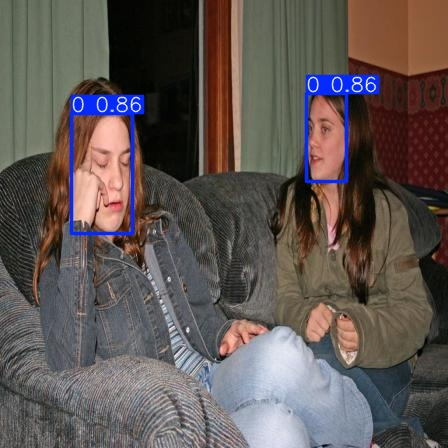

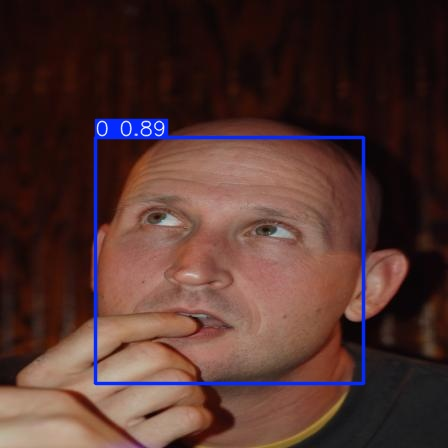

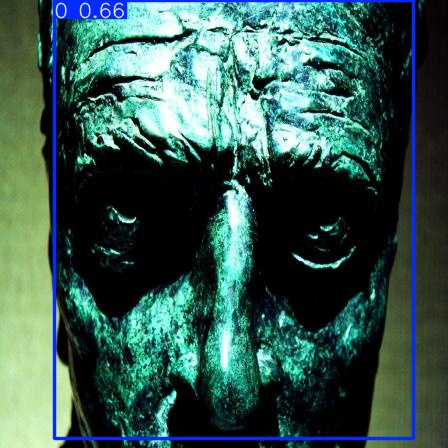

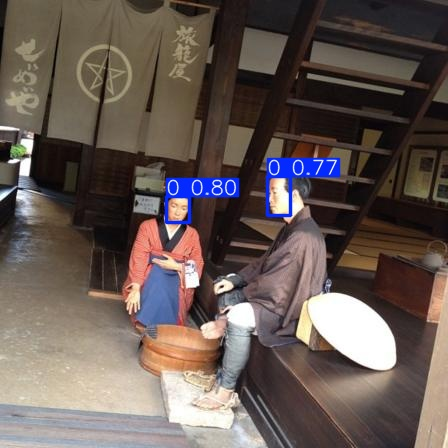

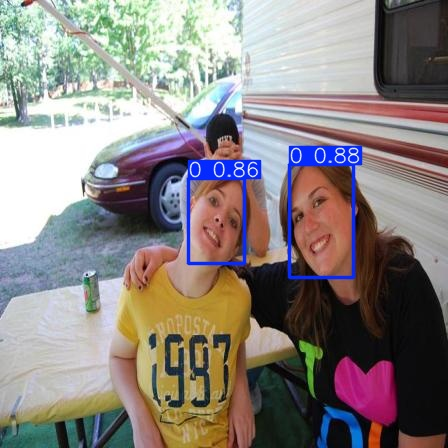

In [7]:
yolo11_model_segmentation=YOLO('YOLO_weights/face-detection-5output/weights/best.pt')  #weights do treino
yolo11_model_segmentation.predict(source='face-detection-5/test/images', save=True )

res_path = 'runs/detect/predict'
for image in os.listdir(res_path)[-5:]:
    display(Image(filename=os.path.join(res_path, image), height=500, width=500))